<a href="https://colab.research.google.com/github/sraeisi/MachineLearning_Physics/blob/master/1/MLP_Basics_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lecture 1: What is Machine Learning and how is it related to Physics? 
======

## Preliminaries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')
plt.rc('figure', figsize=(8,4) )         # Image size

import seaborn as sns


# Simple Regression problem
What do you think "Machine Learning (ML)" is?


Consider the spring example in the notes. 
Let's see how the actual data would look like. 


In [57]:
'''This data is taken from lab report of students in Phys_Lab 3.'''

import io, requests

url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Data/Spring.csv'
s=requests.get(url).content
exp_data=pd.read_csv(io.StringIO(s.decode('utf-8')))


exp_data

,Displacement,Force
0,11.5,0.0
1,14.7,0.1
2,18.0,0.2
3,21.3,0.3
4,24.5,0.4
5,27.6,0.5


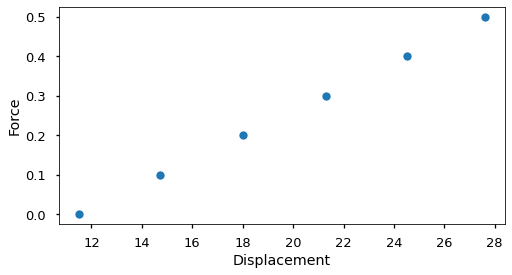

In [58]:
sns.scatterplot(data=exp_data, x='Displacement', y='Force')

In [59]:
## Build a simple model

def model(displacement):
  ## design your model here
  f=0
  return f

In [60]:
exp_data['Model_Prediction'] = exp_data.Displacement.apply(model)
exp_data

,Displacement,Force,Model_Prediction
0,11.5,0.0,0
1,14.7,0.1,0
2,18.0,0.2,0
3,21.3,0.3,0
4,24.5,0.4,0
5,27.6,0.5,0


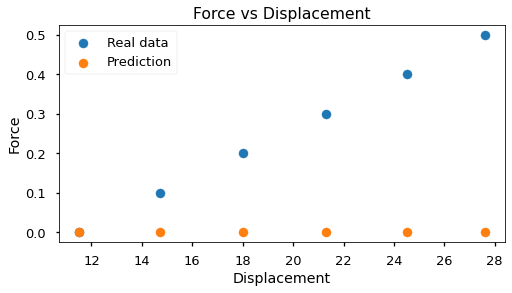

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='Displacement', ylabel='Force', title='Force vs Displacement')

plt.scatter(exp_data.Displacement, exp_data.Force, label='Real data')
plt.scatter(exp_data.Displacement, exp_data.Model_Prediction, label='Prediction')
plt.legend(loc=0)
plt.show()


In [62]:
## Calculate the distance between the prediction and the real data  => Loss

def dist(Y, Y_pred):

  d = 0  ## replace this with what you think is good for the loss

  return d 

## now calculate the distance between your prediction and the actual force. 
# dist(  ,  )  

## Finding a better model

Try to play with your model to improve it. 

What does it mean to improve the model?



In [63]:
'''
Parametric Model:
Here I make a model that has some parameters that we can play with. 
'''
def model(displacement, param=0):
  ## Let's make a linear model with 0 interception. 
  f = param * displacement

  return f


In [64]:
## Let's see what the predictions are:
[model(x, 1) for x in exp_data.Displacement]

[11.5, 14.7, 18.0, 21.3, 24.5, 27.6]

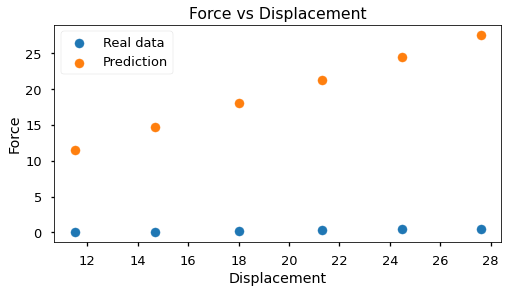

In [65]:
exp_data['Model_Prediction'] = exp_data.Displacement.apply(lambda x: model(x, 1))
exp_data

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='Displacement', ylabel='Force', title='Force vs Displacement')

plt.scatter(exp_data.Displacement, exp_data.Force, label='Real data')
plt.scatter(exp_data.Displacement, exp_data.Model_Prediction, label='Prediction')
plt.legend(loc=0)
plt.show()


In [66]:
from ipywidgets import interact, fixed, FloatSlider

# @interact
def plot_both(param):
  exp_data['Model_Prediction'] = exp_data.Displacement.apply(lambda x: model(x, param))
  
  fig = plt.figure()
  ax = fig.add_subplot(111, xlabel='Displacement', ylabel='Force', title='Force vs Displacement')

  plt.scatter(exp_data.Displacement, exp_data.Force, label='Real data')
  plt.plot(exp_data.Displacement, exp_data.Model_Prediction, label='Prediction', c='r')
  # plt.ylim(-.1,.7)
  plt.legend(loc=0)
  # plt.show()
  plt.close(fig)
  return fig

interact(plot_both, param=FloatSlider(min=0.0, max=1.0, step=.001, value=0))

interactive(children=(FloatSlider(value=0.0, description='param', max=1.0, step=0.001), Output()), _dom_classe…

<function __main__.plot_both>

### Learning

Find the best model that you can!

Explain the process!


In [ ]:
## Plot distance vs param

### Using sklearn

In [67]:
from sklearn.linear_model import LinearRegression

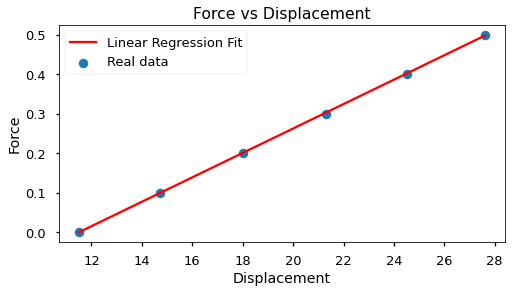

In [73]:
'''
We first train an estimator which  finds a good fit to the data.
'''

reg = LinearRegression()  ## Defines/Constructs the estimator
reg.fit(exp_data.Displacement.values.reshape(-1,1), exp_data.Force)  ##Trains the estimator

x = np.arange(0,5,.1).reshape(50,1)  

### Now we plot the 
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='Displacement', ylabel='Force', title='Force vs Displacement')

plt.scatter(exp_data.Displacement, exp_data.Force, label='Real data')
ax.plot(exp_data.Displacement, reg.predict( exp_data.Displacement.values.reshape(-1,1) ) ,  
        label='Linear Regression Fit' , c= 'r')
plt.legend(loc=0)
plt.show()


# ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title + 
                    #  '\n score=' + str( reg.score(x_list, spring_force_list) ) )

